# Comparing Between Two Experiment 

## Introduction

The aim of this tutorial is to use the ExperimentSet API to compare the results between two experiment using the Experiment and ExperimentSet API. 

## Background: 


In the current experiments, we are going to compare blood samples from two donors, named LRSA and LRSB. In both cases, the blood sample have been incubated with candida albicans for 96hrs followed by classical peptide elution, see The previous tutorial for more details about the Experiment API. 

## Load the Modules 

In [26]:
from IPTK.DataStructure.Experiment import Experiment 
from IPTK.DataStructure.ExperimentalSet import ExperimentSet
from IPTK.IO.InFunctions import load_identification_table
from IPTK.IO.InFunctions import parse_text_table
from IPTK.DataStructure.Proband import Proband 
from IPTK.DataStructure.HLASet import HLASet
from IPTK.DataStructure.Database import SeqDB, GeneExpressionDB, CellularLocationDB
from IPTK.DataStructure.Tissue import Tissue
from IPTK.Visualization.vizTools import plot_overlap_heatmap
import numpy as np 
import pandas as pd 
from typing import List, Dict 

## Define the experiment invarients 

In [2]:
seqs: SeqDB = SeqDB(path2fasta='data/uniprot_sprot.fasta')
expresson_profile: GeneExpressionDB= GeneExpressionDB(path2data='../resources/rna_tissue_consensus.tsv')
protein_locations: CellularLocationDB= CellularLocationDB(path2data='../resources/subcellular_location.tsv')
tissue: Tissue = Tissue(name='total PBMC',
                        main_exp_value=expresson_profile, 
                        main_location=protein_locations)

## Define the experimental varient 

In [3]:
proband_one: Proband =Proband(name='LRS_A')
proband_two: Proband =Proband(name='LRS_B')
hla_one: HLASet = HLASet(hlas=['HLA-DRB1*15:01','HLA-DRB1*13:01'])
hla_two: HLASet = HLASet(hlas=['HLA-DRB1*15:01','HLA-DRB1*13:02'])

## Load the input tables

In [4]:
table_one: pd.DataFrame = parse_text_table(path2file='LRS_A.csv',
                    sep=';', path2fastaDB='data/uniprot_sprot.fasta')
table_two: pd.DataFrame = parse_text_table(path2file='LRS_B.csv',
                    sep=';', path2fastaDB='data/uniprot_sprot.fasta')

## Create the experiments 

In [5]:
# define experiment one 
exp_1: Experiment = Experiment(proband=proband_one,hla_set=hla_one, 
                    tissue=tissue, database=seqs,ident_table=table_one)
# define experiment two 
exp_2: Experiment = Experiment(proband=proband_two,hla_set=hla_two, 
                    tissue=tissue, database=seqs,ident_table=table_two)

## Create an ExperimentalSet Object 

In [7]:
exps: ExperimentSet = ExperimentSet(LRS_A=exp_1, LRS_B=exp_2)

## The Basic Functionaility of API 

### Getting the number of alleles in the set 


In [8]:
num_alleles: Dict[str,int] = exps.get_allele_count()
for allele in num_alleles.keys():
    print(f'{allele} --> {num_alleles[allele]}')

HLA-DRB1*15:01 --> 2
HLA-DRB1*13:01 --> 1
HLA-DRB1*13:02 --> 1


### Getting the name of the probands in the samples

In [10]:
names = exps.get_experimental_names()
for name in names:
    print(f'The following is a memeber :: {name}')

The proband name is :: LRS_A
The proband name is :: LRS_B


In canse more than one sample, is drown from the same proband, we can get the number of experimental objects, i.e. samples, per proband as follow: 


In [11]:
sample_per_objects: Dict[str, int] = exps.get_proband_count()
for pro in sample_per_objects.keys():
    print(f'Proband: {pro} --> count: {sample_per_objects[pro]}')

Proband: LRS_A --> count: 1
Proband: LRS_B --> count: 1


we can also do the counting per tissue, as follow

In [12]:
samples_pro_tissue: Dict[str, int] = exps.get_tissue_counts()
for tissue in samples_pro_tissue.keys():
    print(f'Proband: {tissue} --> count: {samples_pro_tissue[tissue]}')

Proband: total PBMC --> count: 2


## The Grouping operator 

The grouping functions enable you to group experiments in the experimental set and return a NEW experimental set object containing the grouped experiments. Currently, IPTK support two types of grouping; group-by-allele and group-by-proband and group-by-tissue. 

### Grouping by proband 

In [17]:
group_proband:Dict[str,ExperimentSet] = exps.group_by_proband()
for proband in group_proband.keys():
    print(f'Proband: {proband} --> Experimental-Set: {group_proband[proband]} --> Names: {group_proband[proband].get_experimental_names()}')

Proband: LRS_A --> Experimental-Set: an experimental set with 1 Experiments in it --> Names: ['LRS_A0']
Proband: LRS_B --> Experimental-Set: an experimental set with 1 Experiments in it --> Names: ['LRS_B0']


### Grouping by tissue

In [19]:
group_tissue:Dict[str,ExperimentSet] = exps.group_by_tissue()
for tissue in group_tissue.keys():
    print(f'Allele: {tissue} --> Experimental-Set: {group_tissue[tissue]} --> Names: {group_tissue[tissue].get_experimental_names()}')

Allele: total PBMC --> Experimental-Set: an experimental set with 2 Experiments in it --> Names: ['total PBMC0', 'total PBMC1']


For more information about the Grouping check the online documentation 

## Comparing the overlap between the two experiments 

### Comparing peptide overlap 

In [23]:
pep_over_lap:pd.DataFrame = exps.compute_peptide_overlap_matrix()
pep_over_lap

,LRS_A,LRS_B
LRS_A,3461.0,318.0
LRS_B,318.0,3760.0


#### Visualize all the results 

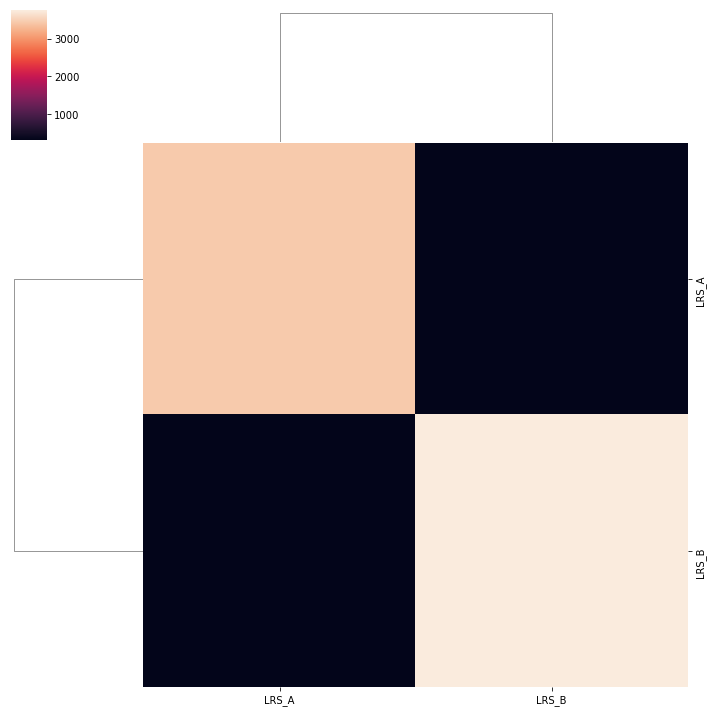

In [28]:
plot_overlap_heatmap(pep_over_lap,{})

### Comparing protein overlap 

In [31]:
pro_over_lap: pd.DataFrame = exps.compute_protein_overlap_matrix()
pro_over_lap

,LRS_A,LRS_B
LRS_A,1335.0,616.0
LRS_B,616.0,1367.0


#### Visualize all the results 

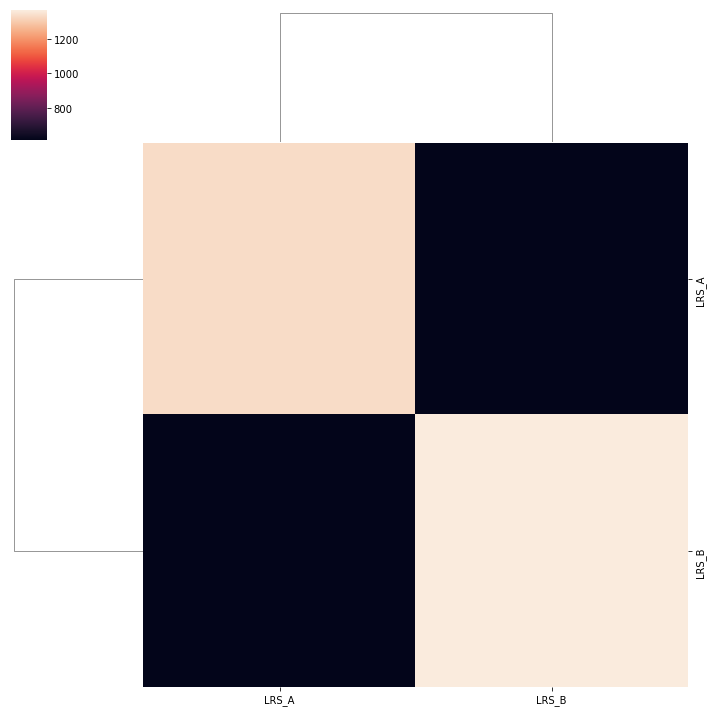

In [32]:
plot_overlap_heatmap(pro_over_lap,{})

In [ ]:
### Compare Gene expression between Experiment 

In [44]:
peptides_in_all: List[str] = exps.get_peptides_present_in_all()
print(f'Number of peptides present in all Experiments: {len(peptides_in_all)}')
for pep in peptides_in_all:
    print(pep)

Number of peptides present in all Experiments: 318
APTNEAFEKIPSETLNRI
QDSILSLPGNVGHQDVK
EKKVVVYLQKLDTAYD
DDGTGQKQIWRIEGSNKVPVDPA
DESGVFIYTTSNHIK
ETIIVLPSNVIN
QAFVTLTTNDAYAK
DNEIKVAKAEAAGHR
VPPEVTVLTNSPVELREPN
RLPQLVGVSTPLQGGS
KSGVYQHVTGEMMGGHA
IKDDVILNEPSADAPA
GSFHASSSLTVKSG
KGSITSVQAIYVPADD
ENYNFELVDGVKLKK
RSGGGGGGGLGSGGSIRSSY
IMNTFSVVPSPKVSDT
ATISTLEAVRGRPFA
SGQAFELILSPRSKES
TGPNLHGLFGR
GDRTFQKWAAVVVPSG
VDDTQFVRFDNDAASPR
DSDVGEFRAVTELGRPD
DAELEFAIQPNTTGKQL
GQDSILSLPGNVGHQDV
SDGSFHASSSLTVKS
EPIYATIGAGVVN
TDHLVKTHTRVSVQRTQAPAVATT
DPNQYYKIRSQAIHQ
ALQNIIPASTGAAKA
NAKYAISMARKIGAR
GSREIKSQQSEVTRIL
GTKAILTIPPNLAYGPR
SDGSFHASSSLTVKSGDE
SKPTLSALPSPLVT
NRPAFMPSEGRMVSDIN
VPPPSIEPLTPPP
GLKGRLDYLSSLKVKG
SRSGGGGGGGLGSGGSIR
DKYMTISGFQIEET
ARTIEYLQPNPASR
KGRLDYLSSLKVK
DAFNLASAHKVPVT
QKQIWRIEGSNKVPVDPA
KDVIAINQDPLGKQG
GVVHVITNVLQPPA
YAVYMVVTSHGVSTK
KPPKPVSKMRMATPLLMQA
AKRVIISAPSADAPMF
RLEEFGRFASFEAQG
DVIAINQDPLGKQG
LKGRLDYLSSLKVKG
MDNEIKVAKAEAAGHR
NGNLIPTHTQPSYR
NRPAFMPSEGRMVSD
YVDDTQFVRFDSDAASPR
ATS

Of Course, in the above case it does not make sense to do a heatmap with two experiment, but it was just performed as an illustration of a normal workflow with the experimental set might contain 10s or 100s of experiments.  

In [45]:
### get the count of each peptides 
pep_count = exps.compute_peptide_representation_count()
print(pep_count)

FVNHNTRIT': 0, 'LNRHFISNKPSKVLSPE': 0, 'NGVVHVITNVLQPPA': 0, 'HPTHEWQALQPGQAVPAG': 0, 'LDTENAMTFQENARGFGQ': 0, 'AQGKYIAIVSTTVETK': 0, 'TSKGLFRAAVPSGASTGIYEA': 0, 'ENAMTFQENARGFGQ': 0, 'RIPEISNITTTPHTLPA': 0, 'SPQTLTTIVKRYSKN': 0, 'ELEFAIQPNTTGKQ': 0, 'ITSVSFSKSGRLL': 0, 'ALAEFAALHGPALR': 0, 'DAFNLASAHKVPV': 0, 'YENIIALQENELKK': 0, 'AEAQEVTIARAIELKH': 0, 'EFRQRYEILTPNSIPKG': 0, 'ESKHEIHSQVDAITAGT': 0, 'KGMSLNLEPDNVGVV': 0, 'CSHSMRYFDTAVSRPGRGEPR': 0, 'YNFELVDGVKLKK': 0, 'ERKGYTPGESIQIFAE': 0, 'LPGAIIGIAREMQP': 0, 'LPQSYLIHEHMVITDR': 0, 'NPRLAILYAKRASV': 0, 'RKEDFSSMSAQLLYKM': 0, 'ETAMRLLHDQVGVIQ': 0, 'QQILLSFKTAYGKD': 0, 'YGKRIHVLPIDDTVEG': 0, 'EKEKYEITEQRKI': 0, 'RSNVCTLVRGRQAG': 0, 'GHDHNLQYLQDENGVGYV': 0, 'EVTIARAIELKH': 0, 'TAEILELAGNAAR': 0, 'RQIEYEYKLAQALH': 0, 'HAKRVTIMPKDIQLAR': 0, 'SATIVMLTNLKERK': 0, 'EAIAELDTLSEESYK': 0, 'LSDIKALIRKHEA': 0, 'KASLAFLQKHLGLHKD': 0, 'TFKEFQNNPNPRSLV': 0, 'RVIITNFPAAKSLDIQ': 0, 'ENDYYTPTGEFRVDRE': 0, 'GNLIPTHTQPSY': 0, 'KAVLEQEETAAASRER': 0, 'YTV

### Comparing protein overlap 

In [43]:
proteins_in_all: List[str] = exps.get_proteins_present_in_all()
print(f'Number of peptides present in all Experiments: {len(proteins_in_all)}')
print()

Number of peptides present in all Experiments: 616
